In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Augment a spiral galaxy image

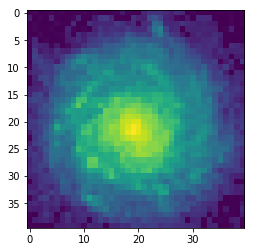

In [2]:
img = cv2.imread('spiral_galaxy.jpg',0) #0 for gray and 1 for color
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

In [3]:
img.shape

(40, 40)

## Affine Transformation

In [4]:
# points for the affine transformation
ip = 10 #inclination point
pts1 = np.float32([[20,5],[5,20],[35,20]])#(y,x)
pts2 = np.float32([[20,ip],[5,20],[35,20]])

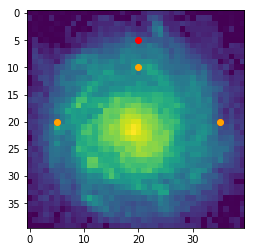

In [5]:
plt.imshow(img)
plt.scatter(pts1[:,0],pts1[:,1],c='red')
plt.scatter(pts2[:,0],pts2[:,1],c='orange')
plt.show()

In [6]:
M = cv2.getAffineTransform(pts1,pts2)

In [7]:
dst = cv2.warpAffine(img,M,(img.shape[1],img.shape[0]))

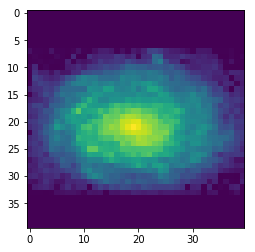

In [8]:
plt.imshow(dst)
plt.show()

## Rotation

In [9]:
ra = 45 #rotation angle

In [10]:
M = cv2.getRotationMatrix2D((img.shape[1]/2,img.shape[0]/2),ra,1)#center, angle, scale

In [11]:
dst2 = cv2.warpAffine(dst,M,(img.shape[1],img.shape[0]))

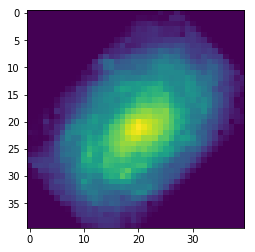

In [12]:
plt.imshow(dst2)
plt.show()

## Perspective Transformation

In [13]:
# perspective points
pr=5
pts1 = np.float32([[5,5],[35,5],[5,35],[35,35]])
pts2 = np.float32([[5+pr,5+pr],[35-pr,5+pr],[5+pr,35-pr],[35-pr,35-pr]])

In [14]:
M = cv2.getPerspectiveTransform(pts1,pts2)

In [15]:
dst3 = cv2.warpPerspective(dst2,M,(img.shape[1],img.shape[0]))

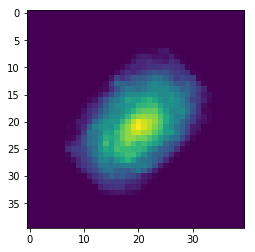

In [16]:
plt.imshow(dst3)
plt.show()

## Flipping

In [17]:
dst4 = np.fliplr(dst3)

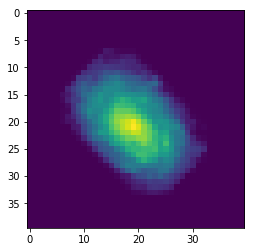

In [18]:
plt.imshow(dst4)
plt.show()

## Add noise

In [19]:
def add_noise(x):
    y = x + np.random.randint(-10,10,(x.shape[0],x.shape[1]))
    y = np.where(y>255,255,y)
    y = np.where(y<0,0,y)
    return y

In [20]:
dst5 = add_noise(dst4)

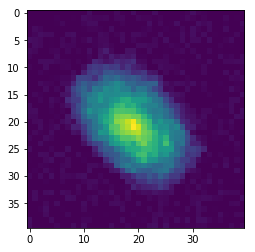

In [21]:
plt.imshow(dst5)
plt.show()

## Save image

In [22]:
cv2.imwrite('object.jpg', dst5, params=None)

True

## Define a function for image augmentation

In [23]:
def Image_Augmentation(x):
    # Affine Transformation
    ip = np.random.uniform(5,15)#inclination point
    pts1 = np.float32([[20,5],[5,20],[35,20]])#(y,x)
    pts2 = np.float32([[20,ip],[5,20],[35,20]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(x,M,(x.shape[1],x.shape[0]))
    # Rotation
    ra = np.random.uniform(0,180)
    M = cv2.getRotationMatrix2D((x.shape[1]/2,x.shape[0]/2),ra,1)
    dst2 = cv2.warpAffine(dst,M,(x.shape[1],x.shape[0]))
    # Perspective Transformation
    pr = np.random.uniform(0,10)
    pts1 = np.float32([[5,5],[35,5],[5,35],[35,35]])
    pts2 = np.float32([[5+pr,5+pr],[35-pr,5+pr],[5+pr,35-pr],[35-pr,35-pr]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst3 = cv2.warpPerspective(dst2,M,(x.shape[1],x.shape[0]))
    # Flipping
    rr = np.random.randint(0,2)
    if rr==1:
        dst4 = np.fliplr(dst3)
    else:
        dst4 = dst3
    # Add noise
    y = dst4 + np.random.randint(-12,12,(x.shape[0],x.shape[1]))
    y = np.where(y>255,255,y)
    y = np.where(y<0,0,y)
    return y

In [24]:
test = Image_Augmentation(img)

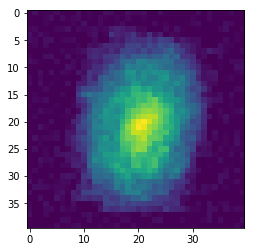

In [25]:
plt.imshow(Image_Augmentation(img))
plt.show()